In [1]:
import numpy as np
from scipy import sparse

In [2]:
eye = np.eye(4)
print("numpy array:\n{}".format(eye))

numpy array:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [3]:
sparse_matrix = sparse.csr_matrix(eye)
print("\nScipy sparse CSR matix:\n{}".format(sparse_matrix))


Scipy sparse CSR matix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [5]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n{}".format(eye_coo))

COO representation:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

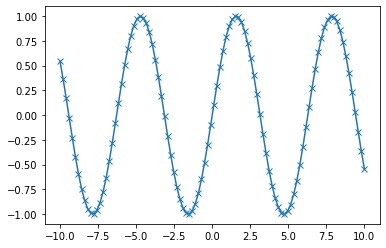

In [20]:
x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.plot(x, y, marker="x")

In [21]:
import pandas as pd

In [22]:
from IPython.display import display

In [23]:
data = {"name":["John", "Anna", "Peter", "Linda"], "location":["New York", "Paris", "Berlin", "London"], "Age":[24, 13, 53, 33]}

In [24]:
data_pandas = pd.DataFrame(data)

In [25]:
display(data_pandas)

,name,location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [28]:
display(data_pandas[data_pandas.Age>30])

,name,location,Age
2,Peter,Berlin,53
3,Linda,London,33


In [29]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [30]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [31]:
iris_dataset["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
iris_dataset["DESCR"]

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [33]:
type(iris_dataset["data"])

numpy.ndarray

In [37]:
iris_dataset.data.shape

(150, 4)

In [35]:
iris_dataset["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset["data"], iris_dataset["target"], random_state=0)

In [39]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

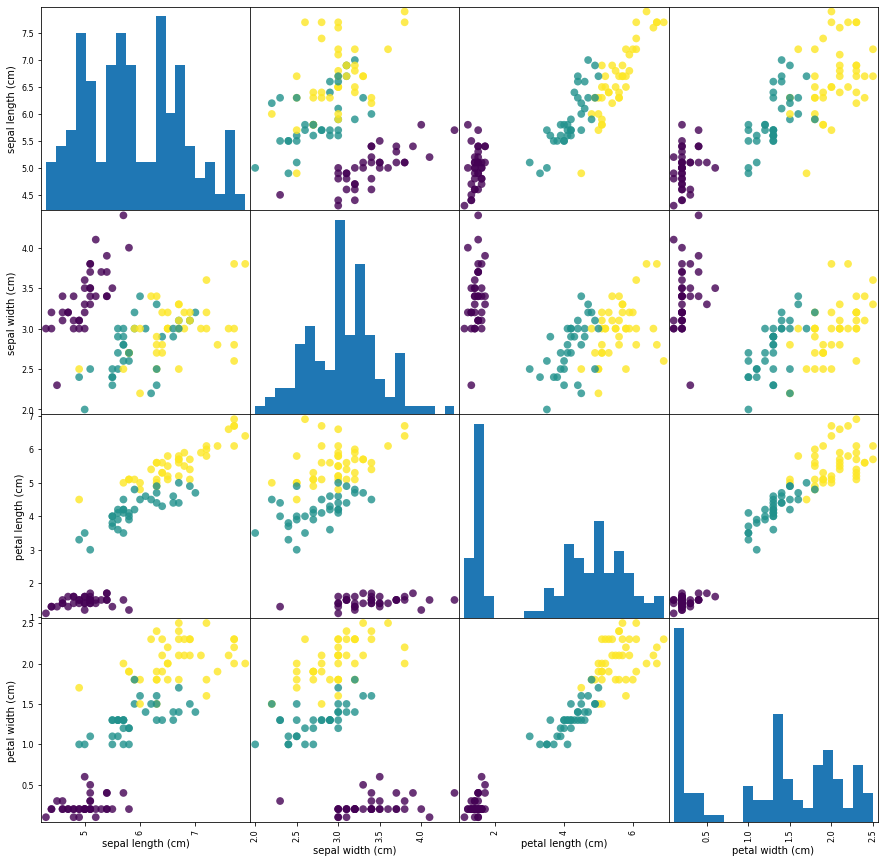

In [47]:
import mglearn
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker="o", hist_kwds={"bins":20}, s=60, alpha=.8)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [49]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [51]:
X_new = np.array([[5, 2.9, 1, 0.2]])

In [52]:
X_new.shape

(1, 4)

In [53]:
prediction = knn.predict(X_new)
prediction
iris_dataset["target_names"][prediction]

array(['setosa'], dtype='<U10')

In [55]:
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [56]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [57]:
knn.score(X_test, y_test)

0.9736842105263158

Text(0, 0.5, 'target')

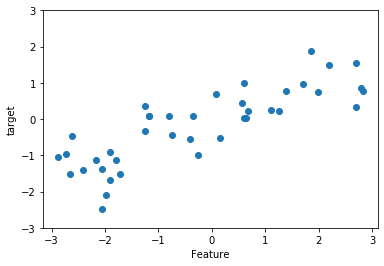

In [59]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, "o")
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("target")

In [73]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [74]:
print({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

{'malignant': 212, 'benign': 357}


In [1]:
import mglearn

c:\users\rooti\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
c:\users\rooti\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


c:\users\rooti\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


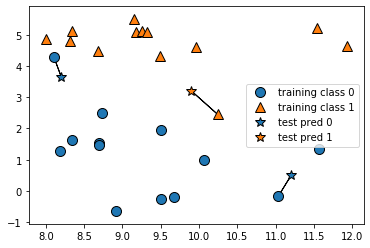

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

c:\users\rooti\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


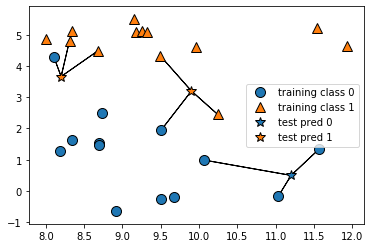

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [4]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

c:\users\rooti\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [6]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [7]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [12]:
"{:.2f}".format(clf.score(X_test, y_test))

'0.86'

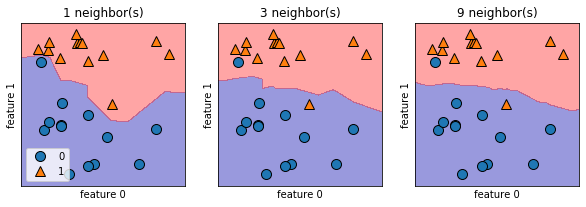

In [20]:
from matplotlib import pyplot as plt
Fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

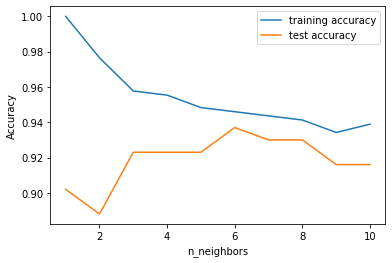

In [27]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
# stratify的目的是保持train data 和 test data 中各类别的比例一致
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

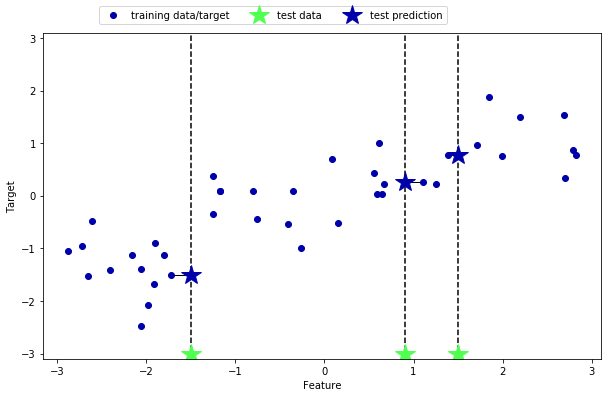

In [28]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

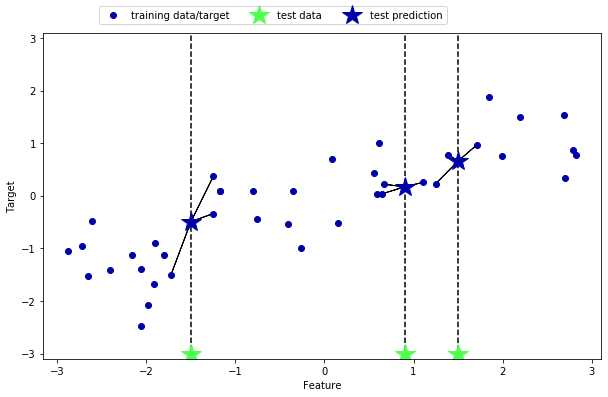

In [29]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [30]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [31]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [32]:
reg.score(X_test, y_test)

0.8344172446249604

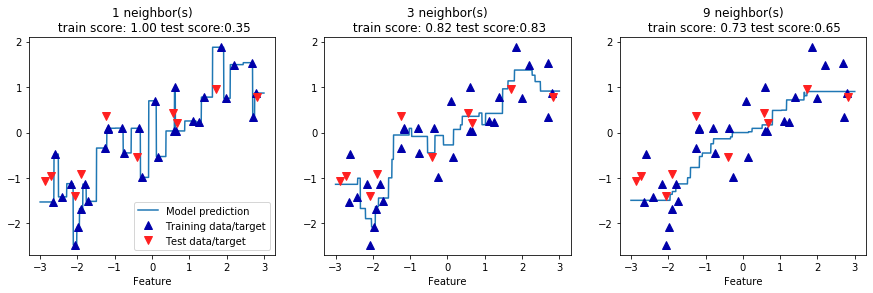

In [36]:
import numpy as np
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score:{:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_label("Target")
axes[0].legend(["Model prediction", "Training data/target", "Test data/target"], loc="best")

w[0]: 0.393906  b: -0.031804


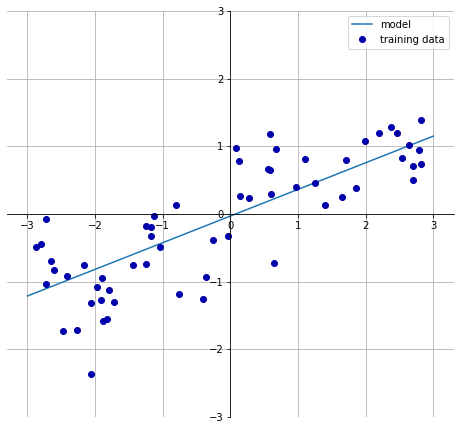

In [37]:
mglearn.plots.plot_linear_regression_wave()

In [41]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [43]:
print("{}".format(lr.coef_))
lr.intercept_

[0.39390555]


-0.031804343026759746

In [44]:
lr.score(X_train, y_train)

0.6700890315075756

In [45]:
lr.score(X_test, y_test)

0.65933685968637

In [6]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [7]:
lr.score(X_train, y_train)

0.9520519609032729

In [8]:
lr.score(X_test, y_test)

0.607472195966596

In [9]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("{:.2f}".format(ridge.score(X_train, y_train)))
ridge.score(X_test, y_test)

0.89


0.7527683481744755

In [10]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("{:.2f}".format(ridge10.score(X_train, y_train)))
ridge10.score(X_test, y_test)

0.79


0.6359411489177311

In [11]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("{:.2f}".format(ridge01.score(X_train, y_train)))
ridge01.score(X_test, y_test)

0.93


0.7722067936479806

In [12]:
from matplotlib import pyplot as plt

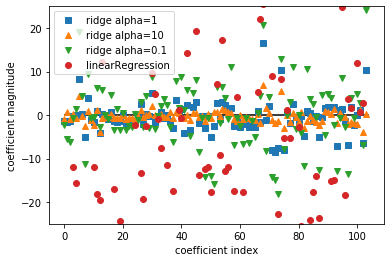

In [22]:
plt.plot(ridge.coef_, "s", label="ridge alpha=1")
plt.plot(ridge10.coef_, "^", label="ridge alpha=10")
plt.plot(ridge01.coef_, "v", label="ridge alpha=0.1")

plt.plot(lr.coef_, "o", label="linearRegression")
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(loc="best")

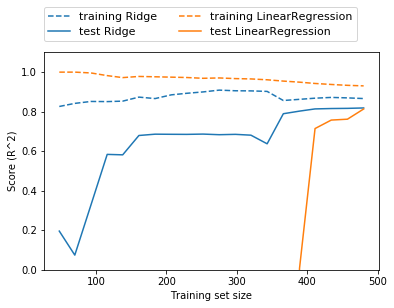

In [23]:
mglearn.plots.plot_ridge_n_samples()

In [26]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
print(np.sum(lasso.coef_ != 0))

0.2932376899111462
0.20937503255272294
4


In [28]:
lasso001= Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(lasso001.score(X_train, y_train))
print(lasso001.score(X_test, y_test))
print(np.sum(lasso001.coef_ != 0))

0.89622265110865
0.7656571174549985
33


In [29]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print(lasso00001.score(X_train, y_train))
print(lasso00001.score(X_test, y_test))
print(np.sum(lasso00001.coef_ != 0))

0.9507158754515467
0.6437467421273203
96


Text(0, 0.5, 'coefficient magnitude')

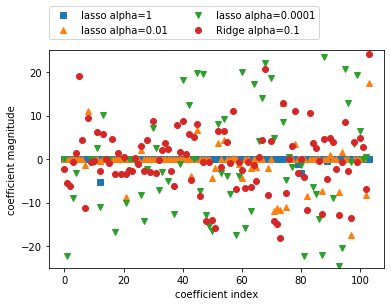

In [40]:
plt.plot(lasso.coef_, "s", label="lasso alpha=1")
plt.plot(lasso001.coef_, "^", label="lasso alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="lasso alpha=0.0001")

plt.plot(ridge01.coef_, "o", label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")

c:\users\hm115177\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
c:\users\hm115177\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hm115177\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


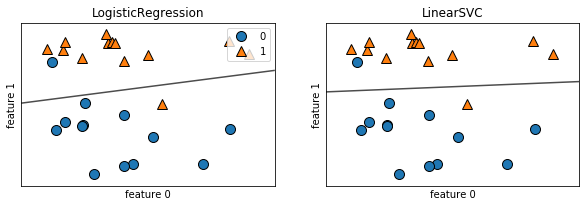

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LogisticRegression(), LinearSVC()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")  
axes[0].legend(loc=1)

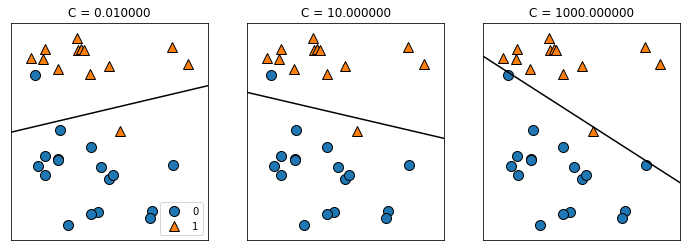

In [51]:
mglearn.plots.plot_linear_svc_regularization()

In [52]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.9530516431924883
0.958041958041958


c:\users\hm115177\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print(logreg100.score(X_train, y_train))
print(logreg100.score(X_test, y_test))

0.9788732394366197
0.965034965034965


c:\users\hm115177\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print(logreg001.score(X_train, y_train))
print(logreg001.score(X_test, y_test))

0.9342723004694836
0.9300699300699301


c:\users\hm115177\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


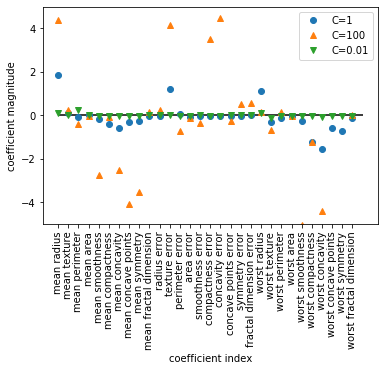

In [62]:
plt.plot(logreg.coef_.T, "o", label="C=1")
plt.plot(logreg100.coef_.T, "^", label="C=100")
plt.plot(logreg001.coef_.T, "v", label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.legend()

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

1.0
0.9370629370629371


In [23]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.9882629107981221
0.951048951048951


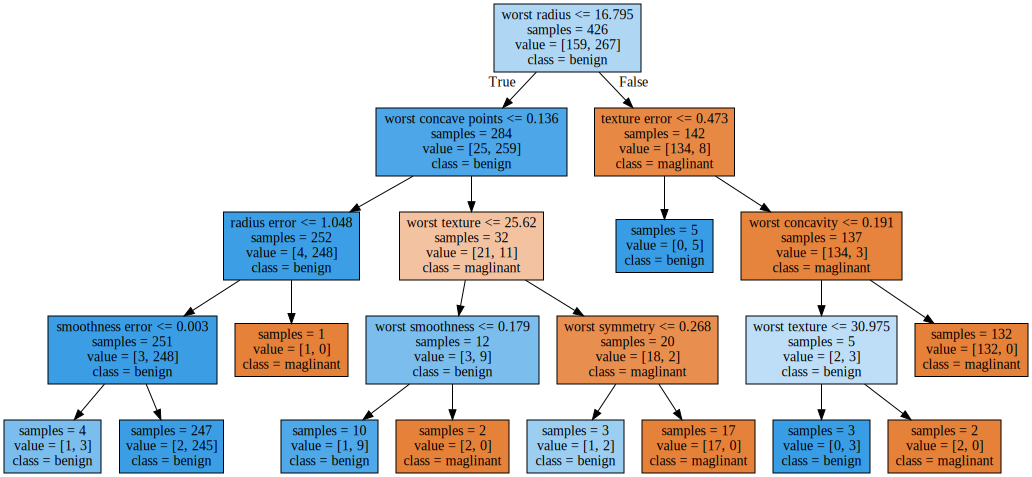

In [24]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["maglinant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [34]:
from matplotlib import pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center",height=0.5)
    plt.yticks(range(n_features), cancer.feature_names)
    plt.xlabel("feature importances")
    plt.ylabel("feature")    

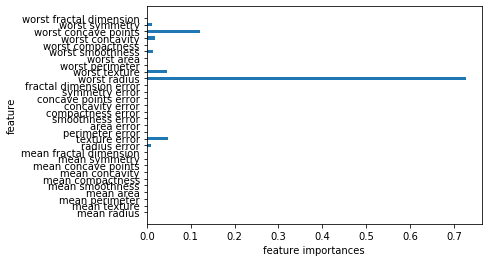

In [35]:
plot_feature_importances_cancer(tree)

In [1]:
import mglearn

tree = mglearn.plots.plot_tree_not_monotone()
display()

c:\users\rooti\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
c:\users\rooti\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Feature importances: [0. 1.]


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y= make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

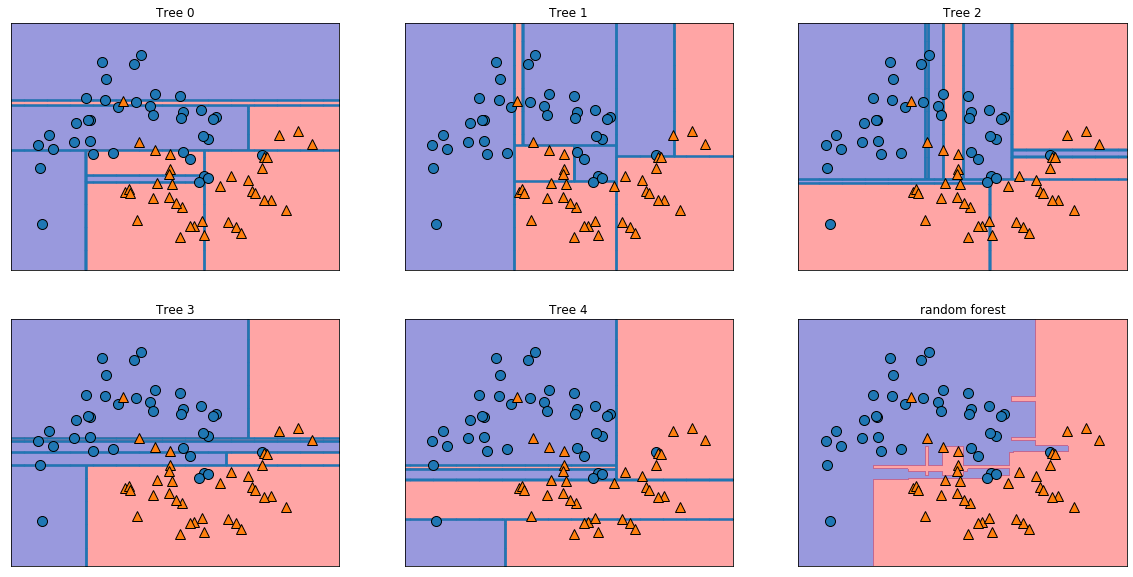

In [13]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)

axes[-1, -1].set_title("random forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [14]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

forest.score(X_train, y_train)

1.0

In [15]:
forest.score(X_test, y_test)

0.972027972027972

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

0.9882629107981221
0.965034965034965


Text(0, 0.5, 'feature 1')

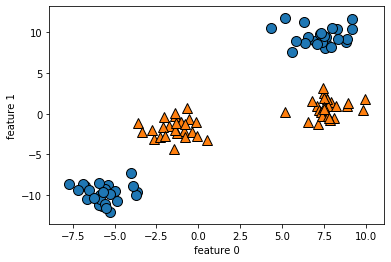

In [10]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import mglearn
X, y = make_blobs(centers=4, random_state=8)
#  把4簇变2簇
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

c:\users\rooti\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'feature 1')

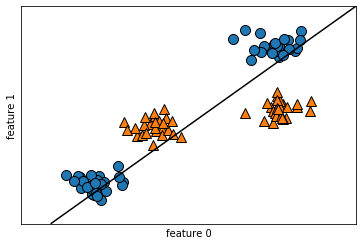

In [12]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0.5, 0, 'feature1 ** 2')

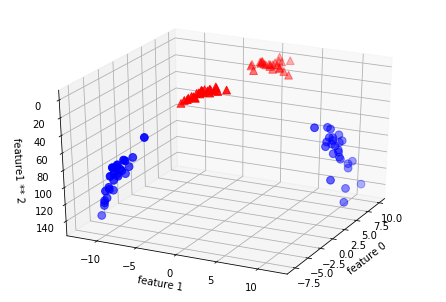

In [24]:
import numpy as np
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c="b", cmap=mglearn.cm2, s=60)
# ~mask表示逆掩码
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c="r", marker="^", cmap=mglearn.cm2, s=60)

ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature1 ** 2")

c:\users\rooti\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

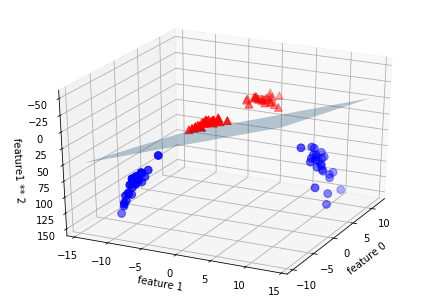

In [38]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c="b", cmap=mglearn.cm2, s=60)
# ~mask表示逆掩码
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c="r", marker="^", cmap=mglearn.cm2, s=60)

ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature1 ** 2")

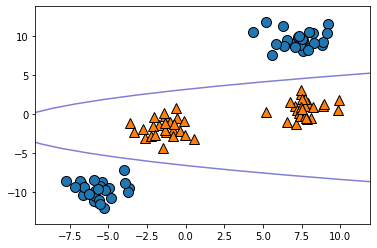

In [46]:
ZZ = YY ** 2
# np.c_按第二维度级联
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
# plt.contour等高线。level=[0],只保留=0的等高线
plt.contour(XX, YY, dec.reshape(XX.shape), levels=[0], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

Text(0, 0.5, 'feature 1')

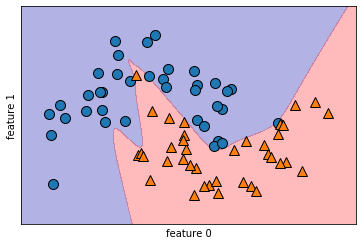

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import mglearn

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver="lbfgs", activation="tanh", random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
#  缩放数据
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
# 测试集要经过相同变换
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(max_iter=1000, random_state=0, alpha=1)
mlp.fit(X_train_scaled, y_train)

print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

0.9882629107981221
0.972027972027972


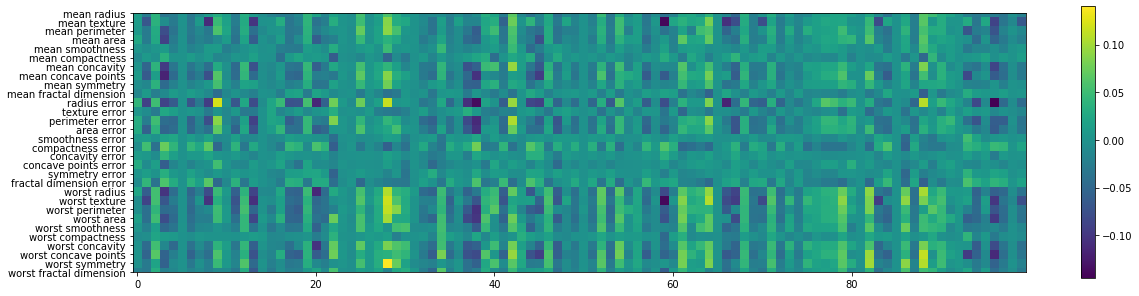

In [6]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation="none", cmap="viridis")
plt.yticks(range(30), cancer.feature_names)
plt.colorbar()

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
# 用一个数组从从另一个数组取值
y_named = np.array(["blue", "red"])[y]
# 对任意多个数组调用train_test_split
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [8]:
print(X_test.shape)
print(gbrt.decision_function(X_test).shape)

(25, 2)
(25,)


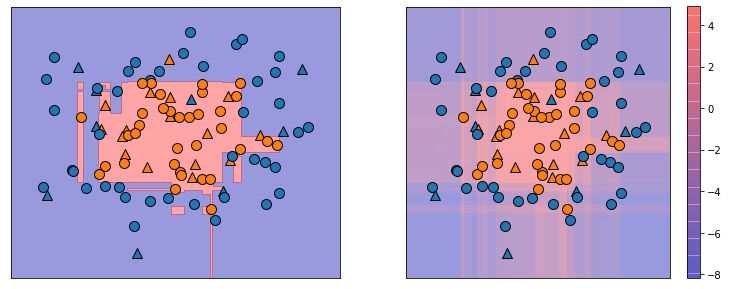

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
score_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers="^", ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers="o", ax=ax)
plt.colorbar(score_image, ax=axes[1])

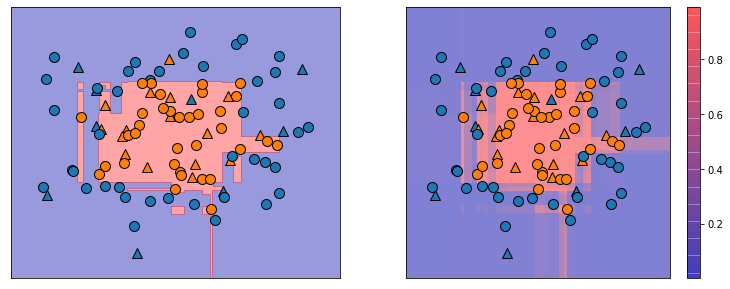

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
score_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function="predict_proba")

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers="^", ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers="o", ax=ax)
plt.colorbar(score_image, ax=axes[1])

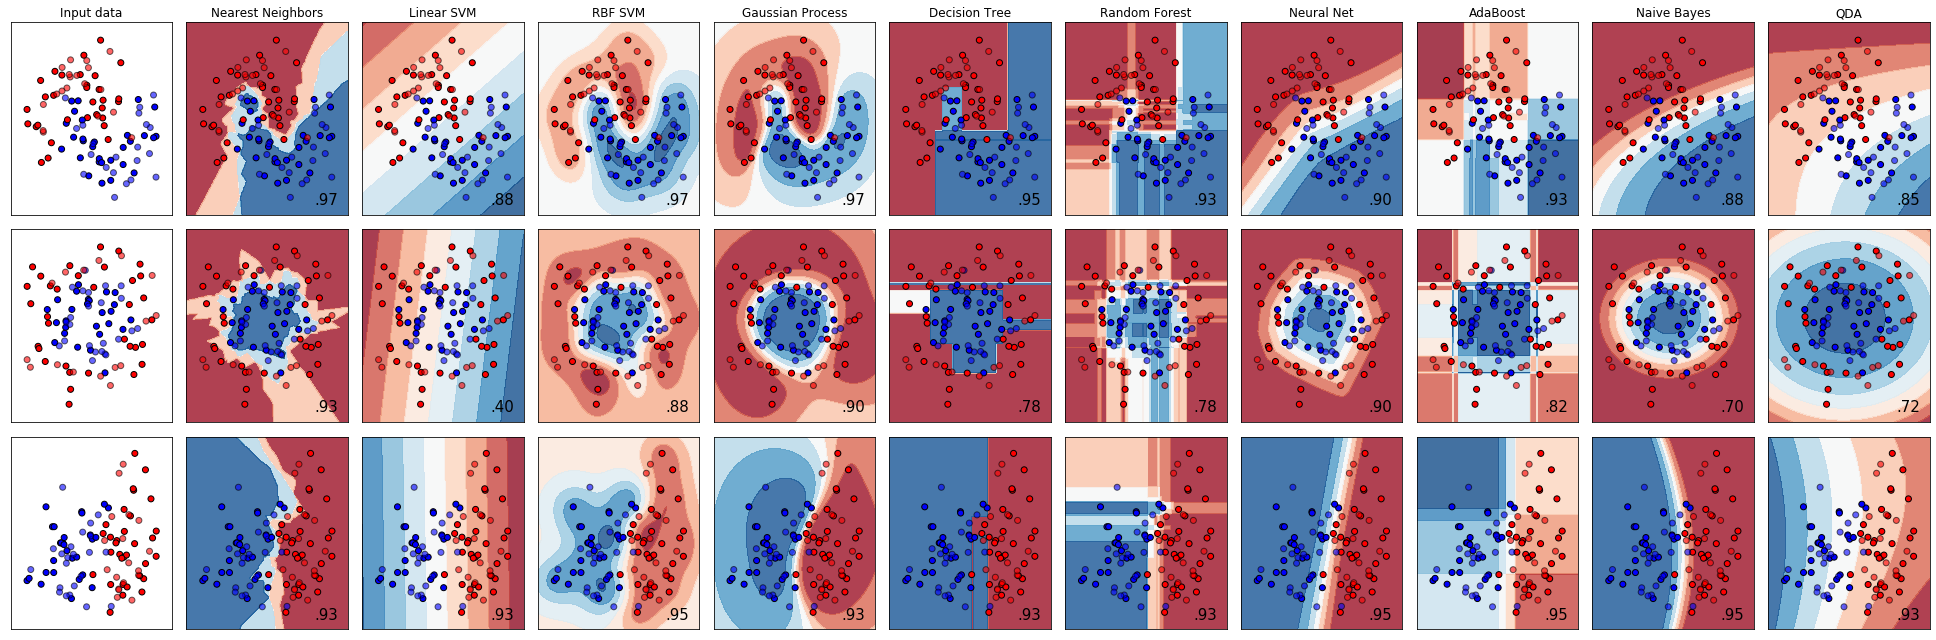

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

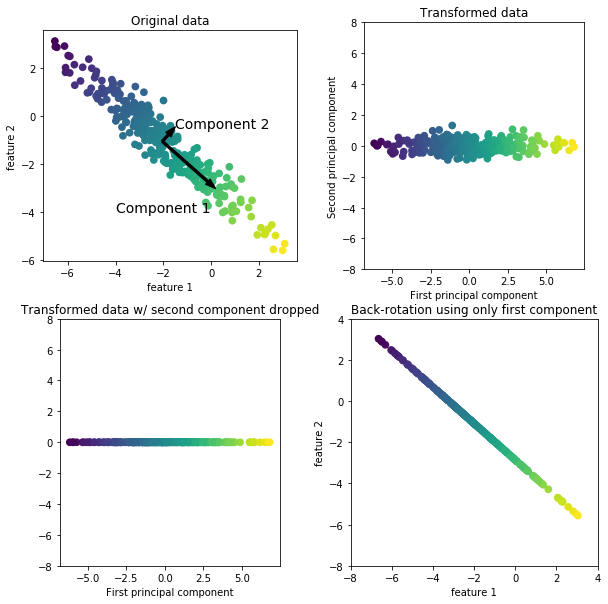

In [13]:
mglearn.plots.plot_pca_illustration()

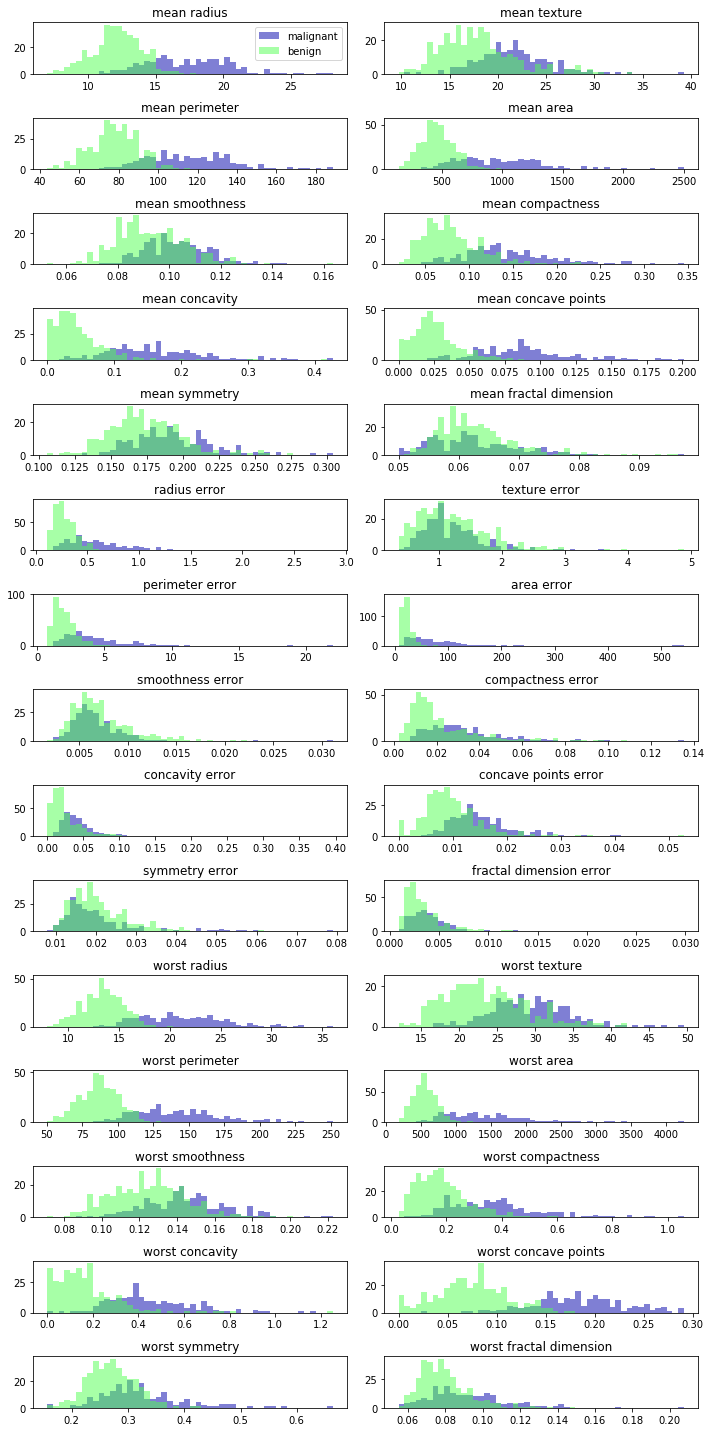

In [20]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
maglinant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target==1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(maglinant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

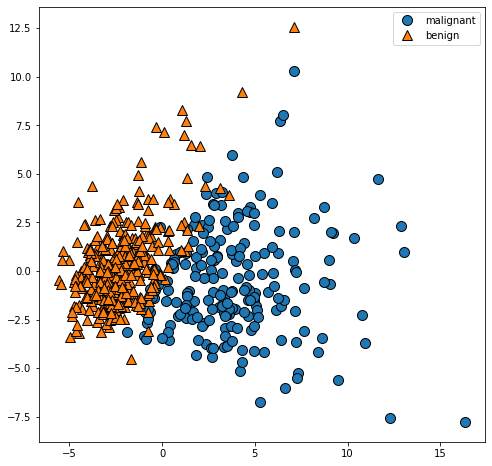

In [27]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")

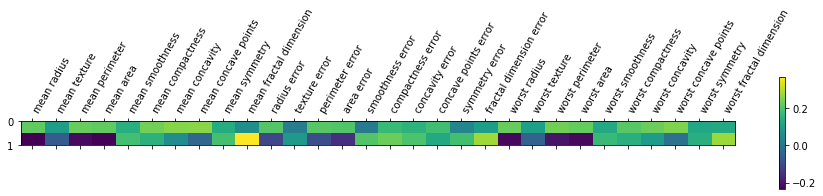

In [30]:
plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0, 1])
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha="left")
plt.colorbar()

In [14]:
from sklearn.datasets import fetch_lfw_people
from matplotlib import pyplot as plt
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={"xticks":(), "yticks":()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap="gray")
    ax.set_title(people.target_names[target])

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1056)>

In [ ]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255

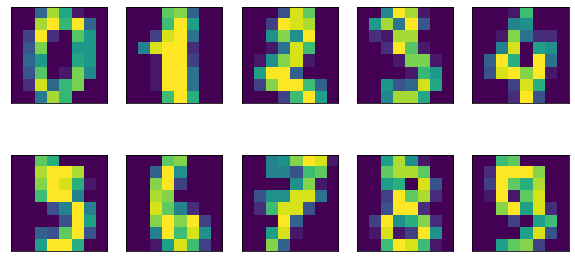

In [5]:
from sklearn.datasets import load_digits

digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={"xticks":(), "yticks":()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

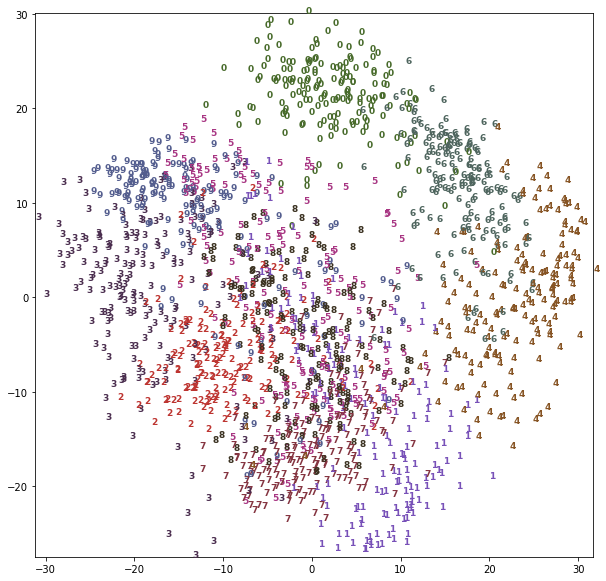

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(digits.data)

digits_pca = pca.transform(digits.data)
colors = ["#476a2a", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),color=colors[digits.target[i]], fontdict={"weight":"bold", "size":9})

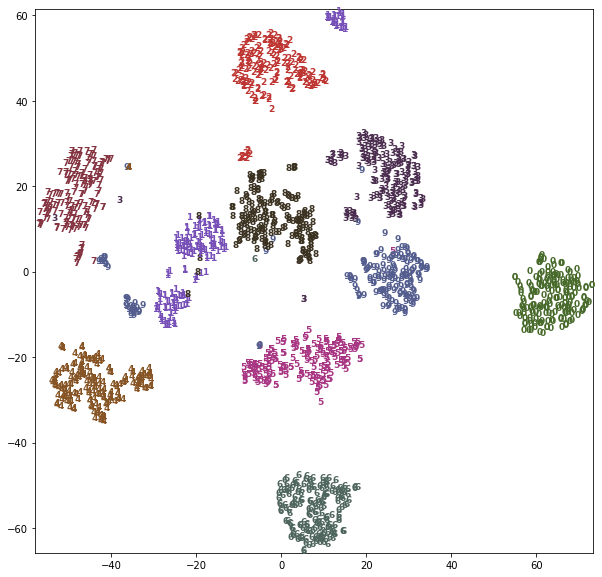

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)

digits_tsne = tsne.fit_transform(digits.data)
colors = ["#476a2a", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()+1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()+1)

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),color=colors[digits.target[i]], fontdict={"weight":"bold", "size":9})

In [12]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=170, n_samples=600)

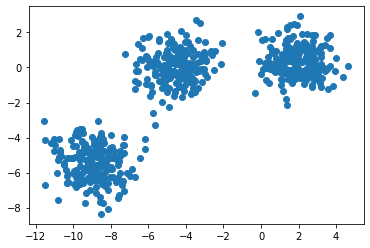

In [13]:
plt.scatter(X[:, 0], X[:, 1])